In [1]:

from modeling_hierarchical import HierarchicalLongtriever
from modeling_longtriever import Longtriever
from transformers import AutoTokenizer
from data_handler import DataCollatorForEvaluatingHierarchicalLongtriever, DatasetForFineTuning, DataCollatorForEvaluatingLongtriever
from beir.datasets.data_loader import GenericDataLoader

from attention_analyzer import AttentionAnalyzer, BlockStructure, LongtrieverStructure

/Tmp/lvpoellhuber/bmir-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /u/poellhul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
generic_long_example = """
    '"From Wikipedia, the free encyclopedianavigation search For international arms restrictions, see arms control. For techniques for the safe handling, possession, and storage of firearms, see gun safety. For the debate about gun control in the U. S., see Gun politics in the United States. Gun control (or firearms regulation) [1] [2] is the set of laws or policies that regulate the manufacture, sale, transfer, possession, modification, or use of firearms by civilians. Most countries have a restrictive firearm guiding policy, with only a few legislations being categorized as permissive. [3] Jurisdictions that regulate access to firearms typically restrict access to only certain categories of firearms and then to restrict the categories of persons who will be granted a firearms license to have access to a firearm. In some countries such as the United States, gun control may be legislated at either a federal level or a local state level. Contents [ hide ]1 Terminology and context2 Regulation of civilian firearms2.1 International and regional civilian firearm regulation3 Studies3.1 General3.2 United States3.2.1 Cross-sectional studies3.2.2 Reviews3.2.3 Studies of individual laws3.2.4 Other studies and debate3.3 Canada3.4 Australia3.5 Other countries4 See also4.1 International4.2 United States5 Notes6 References7 Bibliography8 External links Terminology and context See also: Small arms trade and Small arms and light weapons Gun control refers to domestic regulation of firearm manufacture, trade, possession, use, and transport, specifically with regard to the class of weapons referred to as small arms ( revolvers and self-loading pistols, rifles and carbines, assault rifles, submachine guns and light machine guns ). [4] [5]Usage of the term gun control is sometimes politicized. [6] Some of those in favor of legislation instead prefer to use terms such as ""gun-violence prevention"", ""gun safety"", ""firearms regulation"", ""illegal guns"", or ""criminal access to guns"". [7]In 2007, it was estimated that there were, globally, about 875 million small arms in the hands of civilians, law enforcement agencies, and armed forces. [a] [8] Of these firearms 650 million, or 75%, are held by civilians. [8] U. S. civilians account for 270 million of this total. [8] A further 200 million are controlled by state military forces. [9] Law enforcement agencies have some 26 million small arms. [9] Non-state armed groups [b] have about 1.4 million firearms. [c] [9] Finally, gang members hold between 2 and 10 million small arms. [9] Together, the small arms arsenals of non-state armed groups and gangs account for, at most, 1.4% of the global total. [10]Regulation of civilian firearms Barring a few exceptions, [d] most countries in the world allow civilians to purchase firearms subject to certain restrictions. [13] A 2011 survey of 28 countries over five continents [e] found that a major distinction between different national regimes of firearm regulation is whether civilian gun ownership is seen as a right or a privilege. [16] The study concluded that both the United States and Yemen were distinct from the other countries surveyed in viewing firearm ownership as a basic right of civilians and in having more permissive regimes of civilian gun ownership. [16] In the remaining countries included in the sample, civilian firearm ownership is considered a privilege and the legislation governing possession of firearms is correspondingly more restrictive. [16]International and regional civilian firearm regulation At the international and regional level, diplomatic attention has tended to focus on the cross-border illegal trade in small arms as an area of particular concern rather than the regulation of civilian-held firearms. [17] During the mid-1990s, however, the United Nations Economic and Social Council (ECOSOC) adopted a series of resolutions relating to the civilian ownership of small arms. [17] These called for an exchange of data on national systems of firearm regulation and for the initiation of an international study of the issue. [17] In July 1997, ECOSOC issued a resolution that underlined the responsibility of UN member states to competently regulate civilian ownership of small arms and which urged them to ensure that their regulatory frameworks encompassed the following aspects: firearm safety and storage; penalties for the unlawful possession and misuse of firearms; a licensing system to prevent undesirable persons from owning firearms; exemption from criminal liability to promote the surrender by citizens of illegal, unsafe or unwanted guns; and, a record-keeping system to track civilian firearms. [17] In 1997, the UN published a study based on member state survey data titled the United Nations International Study on Firearm Regulation which was updated in 1999. [f] [17] This study was meant to initiate the establishment of a database on civilian firearm regulations which would be run by the Centre for International Crime Prevention, located in Vienna. who were to report on national systems of civilian firearm regulation every two years. [17] These plans never reached fruition and further UN-led efforts to establish international norms for the regulation of civilian-held firearms were stymied. [18] Responding to pressure from the U. S. government, [g] [20] any mention of the regulation of civilian ownership of small arms was removed from the draft proposals for the 2001 UN Programme of Action on Small Arms. [17]Although the issue is no longer part of the UN policy debate, since 1991 there have been eight regional agreements involving 110 countries concerning aspects of civilian firearm possession. [17] The Bamako Declaration, [h] was adopted in Bamako, Mali, on 1 December 2000 by the representatives of the member states of the Organisation of African Unity (OAU). [21] The provisions of this declaration recommend that the signatories would establish the illegal possession of small arms and light weapons as a criminal offence under national law in their respective countries. [22]Studies High rates of gun mortality and injury are often cited as a primary impetus for gun control policies. [23] A 2004 National Research Council critical review found that while some strong conclusions are warranted from current research, the state of our knowledge is generally poor. [24] The result of the scarcity of relevant data is that gun control is one of the most fraught topics in American politics [25] and scholars remain deadlocked on a variety of issues. [25] Notably, since 1996, when the Dickey Amendment was first inserted into the federal spending bill, the United States Centers for Disease Control and Prevention has been prohibited from using its federal funding ""to advocate or promote gun control,"" thwarting gun violence research at the agency at the time. The funding provision\'s author has said that this was an over-interpretation, [26] but the amendment still had a chilling effect, effectively halting federally funded firearm-related research. [27] Since the amendment, the CDC has continued to research gun violence and publish studies about it, [28] although their funding for such research has fallen by 96% since 1996, according to Mayors Against Illegal Guns. [29] According to a spokesman, the CDC has limited funding and hasn\'t produced any comprehensive study aimed at reducing gun violence since 2001. [30]General A 1998 review found that suicide rates generally declined after gun control laws were enacted, and concluded that ""The findings support gun control measures as a strategy for reducing suicide rates."" [31] A 2016 review found that laws banning people under restraining orders due to domestic violence convictions from accessing guns were associated with ""reductions in intimate partner homicide"". [32] Another 2016 review identified 130 studies regarding restrictive gun laws and found that the implementation of multiple such laws simultaneously was associated with a decrease in gun-related deaths. [33]According to a 2011 UN study, after identifying a number of methodological problems, it stated ""notwithstanding such challenges, a significant body of literature tends to suggest that firearm availability predominantly represents a risk factor rather than a protective factor for homicide. In particular, a number of quantitative studies tend towards demonstrating a firearm prevalence-homicide association."" [34]United States Main articles: Gun law in the United States, Gun politics in the United States, Gun culture in the United States, and Gun violence in the United States Cross-sectional studies In 1983, a cross-sectional study of all 50 U. S. states found that the six states with the strictest gun laws (according to the National Rifle Association) had suicide rates that were approximately 3/100,000 people lower than in other states, and that these states\' suicide rates were 4/100,000 people lower than those of states with the least restrictive gun laws. [35] A 2003 study published in the American Journal of Preventive Medicine looked at the restrictiveness of gun laws and suicide rates in men and women in all 50 U. S. states and found that states whose gun laws were more restrictive had lower suicide rates among both sexes. [36] In 2004, another study found that the effect of state gun laws on gun-related homicides was ""limited"". [37] A 2005 study looked at all 50 states in the U. S. and the District of Columbia, and found that no gun laws were associated with reductions in firearm homicide or suicide, but that a "" shall-issue "" concealed carry law may be associated with increased firearm homicide rates. [38] A 2011 study found that firearm regulation laws in the United States have ""a significant deterrent effect on male suicide"". [39] A 2013 study found that in the United States, ""A higher number of firearm laws in a state are associated with a lower rate of firearm fatalities in the state."" [40] A 2016 study published in The Lancet found that of 25 laws studied, and in the time period examined (2008–2010), nine were associated with reduced firearm mortality (including both homicide and suicide), nine were associated with increased mortality, and seven had an inconclusive association. The three laws most strongly associated with reduced firearm mortality were laws requiring universal background checks, background checks for ammunition sales, and identification for guns. [41] In an accompanying commentary, David Hemenway noted that this study had multiple limitations, such as not controlling for all factors that may influence gun-related deaths aside from gun control laws, and the use of 29 explanatory variables in the analysis. [42]Other studies comparing gun control laws in different U. S. states include a 2015 study which found that in the United States, ""stricter state firearm legislation is associated with lower discharge rates"" for nonfatal gun injuries. [43] A 2014 study that also looked at the United States found that children living in states with stricter gun laws were safer. [44] Another study looking specifically at suicide rates in the United States found that the four handgun laws examined (waiting periods, universal background checks, gun locks, and open carrying regulations) were associated with ""significantly lower firearm suicide rates and the proportion of suicides resulting from firearms."" The study also found that all four of these laws (except the waiting-period one) were associated with reductions in the overall suicide rate. [45] Another study, published the same year, found that states with permit to purchase, registration, and/or license laws for handguns had lower overall suicide rates, as well as lower firearm suicide rates. [46] A 2014 study found that states that required licensing and inspections of gun dealers tended to have lower rates of gun homicides. [47] Another study published the same year, analyzing panel data from all 50 states, found that stricter gun laws may modestly reduce gun deaths. [48] A 2016 study found that U. S. military veterans tend to commit suicide with guns more often than the general population, thereby possibly increasing state suicide rates, and that ""the tendency for veterans to live in states without handgun legislation may exacerbate this phenomenon."" [49] California has exceptionally strict gun sales laws, and a 2015 study found that it also had the oldest guns recovered in crimes of any states in the U. S.. The same study concluded that ""These findings suggest that more restrictive gun sales laws and gun dealer regulations do make it more difficult for criminals to acquire new guns first purchased at retail outlets."" [50] Another 2016 study found that stricter state gun laws in the United States reduced suicide rates. [51] Another 2016 study found that U. S. states with lenient gun control laws had more gun-related child injury hospital admissions than did states with stricter gun control laws. [52] A 2017 study found that suicide rates declined more in states with universal background check and mandatory waiting period laws than in states without these laws. [53] Another 2017 study found that states without universal background check and/or waiting period laws had steeper increases in their suicide rates than did states with these laws. [54] A third 2017 study found that ""waiting period laws that delay the purchase of firearms by a few days reduce gun homicides by roughly 17%."" [55] A 2017 study in the Economic Journal found that mandatory handgun purchase delays reduced ""firearm related suicides by between 2 to 5 percent with no statistically significant increase in non-firearm suicides,"" and were ""not associated with statistically significant changes in homicide rates."" [56]Reviews A review of published studies of gun control released in October 2003 by the Centers for Disease Control and Prevention was unable to determine any statistically significant effect resulting from such laws, although the authors suggest that further study may provide more conclusive information, and noted that ""insufficient evidence to determine effectiveness should not be interpreted as evidence of ineffectiveness"". [57]: 18In 2015, Garen Wintemute and Daniel Webster reviewed studies examining the effectiveness of gun laws aimed at keeping guns out of the hands of high-risk individuals in the United States. They found that some laws prohibiting gun possession by people under domestic violence restraining orders or who had been convicted of violent misdemeanors were associated with lower violence rates, as were laws establishing more procedures to see if people were prohibited from owning a gun under these laws. They also found that multiple other gun regulations intended to prevent prohibited individuals from obtaining guns, such as ""rigorous permit-to-purchase"" laws and ""comprehensive background checks"", were ""negatively associated with the diversion of guns to criminals."" [58]A 2016 systematic review found that restrictive gun licensing laws were associated with lower gun injury rates, while concealed carry laws were not significantly associated with rates of such injuries. [59] Another systematic review found that stricter gun laws were associated with lower gun homicide rates; this association was especially strong for background check and permit-to-purchase laws. [60]Studies of individual laws Other studies have examined trends in firearm-related deaths before and after gun control laws are either enacted or repealed. A 2004 study in the Journal of the American Medical Association found evidence that child access prevention laws were ""associated with a modest reduction in suicide rates among youth aged 14 to 17 years."" [61] Two 2015 studies found that the permit-to-purchase law passed in Connecticut in 1995 was associated with a reduction in firearm suicides and homicides. [62] [63] One of these studies also found that the repeal of Missouri\'s permit-to-purchase law was associated with ""a 16.1% increase in firearm suicide rates,"" [62] and a 2014 study by the same research team found that the repeal of this law was associated with a 16% increase in homicide rates. [64] A 2000 study designed to assess the effectiveness of the Brady Handgun Violence Prevention Act found that the law was not associated with reductions in overall homicide or suicide rates, but that it was associated with a reduction in the firearm suicide rate among individuals aged 55 or older. [65] A 1991 study looked at Washington, D. C. \'s Firearms Control Regulations Act of 1975, which banned its residents from owning all guns except certain shotguns and sporting rifles, which were also required to be unloaded, disassembled, or stored with a trigger lock in their owners\' homes. [66] The study found that the law\'s enactment was associated with ""a prompt decline in homicides and suicides by firearms in the District of Columbia."" [67] A 1996 study reanalyzed this data and reached a significantly different conclusion as to the effectiveness of this law. [68]Other studies and debate Kleck and Patterson analyzed the impact of 18 major types of gun control laws on every major type of violent crime or violence (including suicide) in 170 U. S. cities, and found that gun laws generally had no significant effect on violent crime rates or suicide rates. [69] [ needs update] Similarly, a 1997 study found that gun control laws had only a small influence on the rate of gun deaths in U. S. states compared to socioeconomic variables. [70] [ needs update]Philosophy professor Michael Huemer argues that gun control may be morally wrong, even if its outcomes would be positive, because individuals have a prima facie right to own a gun for self-defence and recreation. [71]Canada Main article: Gun laws in Canada Rifles and shotguns are relatively easy to obtain, while handguns and some semi-automatic rifles are restricted. [72]With respect to the Criminal Law Amendment Act, a gun control law passed in Canada in 1977, some studies have found that it was ineffective at reducing homicide or robbery rates. [73] [74] One study even found that the law may have actually increased robberies involving firearms. [74] A 1993 study found that after this law was passed, gun suicides decreased significantly, as did the proportion of suicides committed in the country with guns. [75] A 2003 study found that this law ""may have had an impact on suicide rates, even after controls for social variables,"" [76] while a 2001 study by the same research team concluded that the law ""may have had an impact on homicide rates, at least for older victims."" [77] A 1994 study found that after this law came into force in 1978, suicide rates decreased over time in Ontario, and that there was no evidence of method substitution. The same study found that ""These decreases may be only partly due to the legislation."" [78]In 1991, Canada implemented the gun control law Bill C-17. According to a 2004 study, after this law was passed, firearm-related suicides and homicides, as well as the percentage of suicides involving firearms, declined significantly in that country. [79] A 2010 study found that after this law was passed, firearm suicides declined in Quebec among men, but acknowledged that this may not represent a causal relationship. [80] In 1992, Canada promulgated the Canadian Firearms Act, which aimed at ensuring that guns were stored safely. A 2004 study found that although firearm suicide rates declined in the Quebec region Abitibi-Témiscamingue after the law was passed, overall suicide rates did not. [81] A 2008 study reached similar conclusions with regard to the entire Quebec province; this study also found that C-17 did not seem to increase the rate at which the firearm suicide rate was declining. [82] Other researchers have criticized this 2008 study for looking at too short a time period and not taking account of the fact that the regulations in C-17 were implemented gradually. [80]A 1990 study compared suicide rates in the Vancouver, British Columbia, Canada metropolitan area (where gun control laws were more restrictive) with those in the Seattle, Washington area in the United States. The overall suicide rate was essentially the same in the two locations, but the suicide rate among 15 to 24 year olds was about 40 percent higher in Seattle than in Vancouver. The authors concluded that ""restricting access to handguns might be expected to reduce the suicide rate in persons 15 to 24 years old, but...it probably would not reduce the overall suicide rate."" [83]A 2012 study looked at gun control laws passed in Canada from 1974 to 2008 and found no evidence that these laws had a beneficial effect on firearm homicide rates in that country. According to the study, ""other factors found to be associated with homicide rates were median age, unemployment, immigration rates, percentage of population in low-income bracket, Gini index of income equality, population per police officer, and incarceration rate."" [84]A 2013 study of the 1995 Canadian gun control law Firearms Act, 1995 reported little evidence that this law significantly reduced rates of lethal gun violence against women. [85]Australia Main article: Gun laws in Australia In 1988 and 1996, gun control laws were enacted in the Australian state of Victoria, both times following mass shootings. A 2004 study found that in the context of these laws, overall firearm-related deaths, especially suicides, declined dramatically. [86] A 1995 study found preliminary evidence that gun control legislation enacted in Queensland, Australia reduced suicide rates there. [87]A 2006 study by gun lobby-affiliated researchers Jeanine Baker and Samara Mc Phedran found that after Australia enacted the National Firearms Agreement (NFA), a gun control law, in 1996, gun-related suicides may have been affected, but no other parameter appeared to have been. [88] Another 2006 study, led by Simon Chapman, found that after this law was enacted in 1996 in Australia, the country went more than a decade without any mass shootings, and gun-related deaths (especially suicides) declined dramatically. [89] The latter of these studies also criticized the former for using a time-series analysis despite the fact that, according to Chapman et al., ""calculating mortality rates and then treating them as a number in a time series ignores the natural variability inherent in the counts that make up the numerator of the rate."" Chapman et al. also said that Baker and Mc Phedran used the Box–Jenkins model inappropriately. [89] A 2010 study looking at the effect of the NFA on gun-related deaths found that the law ""did not have any large effects on reducing firearm homicide or suicide rates,"" [90] although David Hemenway has criticized this study for using a structural break test despite the fact that such tests can miss the effects of policies in the presence of lags, or when the effect occurs over several years. [91] Another study, published the same year, found that Australia\'s gun buyback program reduced gun-related suicide rates by almost 80%, while non-gun death rates were not significantly affected. [92] Other research has argued that although gun suicide rates fell after the NFA was enacted, the NFA may not have been responsible for this decrease and ""a change in social and cultural attitudes"" may have instead been at least partly responsible. [93] In 2016, Chapman co-authored another study that found that after the NFA was passed, there were no mass shootings in the country (as of May 2016), and that gun-related death rates declined more quickly after the NFA than they did before it. The study also found, however, that non-gun suicide and homicide rates declined even more quickly after the NFA, leading the authors to conclude that ""it is not possible to determine whether the change in firearm deaths can be attributed to the gun law reforms."" [94]Other countries Further information: Overview of gun laws by nation A 2007 study found evidence that gun control laws passed in Austria in 1997 reduced the rates of firearm suicide and homicide in that country. [95] In Brazil, after disarmament laws were passed in 2003, [96] gun-related mortality declined by 8% in 2004 relative to the previous year, the first decline observed in a decade. Gun-related hospitalizations also reversed their previous trend by decreasing 4.6% from 2003 to 2004. [97] A 2006 study found that after gun control laws were passed in New Zealand in 1992, suicides committed with guns declined significantly, especially among youth. The same study found a decline in overall youth suicide after the laws were passed, but also concluded that ""it is not possible to determine the extent to which this was accounted for by changes in firearms legislation or other causes."" [98] A 2010 study looked at the effect of a policy adopted by the Israeli Defense Forces that restricted access to guns among adolescents on suicide rates, and found that ""Following the policy change, suicide rates decreased significantly by 40%."" The authors concluded that ""The results of this study illustrate the ability of a relatively simple change in policy to have a major impact on suicide rates."" [99] A 2013 study showed that after the Military of Switzerland adopted the Army XXI reform, which restricted gun availability, in 2003, suicide rates—both overall and firearm-related—decreased. [100] Another 2013 study looking at four restrictive gun laws passed in Norway found that two of them may have reduced firearm mortality among men, but that the evidence was more inconclusive with respect to all of the laws they studied. [101] A 2014 study found that after South Africa \'s Firearm Control Act was passed in 2000, homicide rates in the country declined, and concluded that ""stricter gun control mediated by the FCA accounted for a significant decrease in homicide overall, and firearm homicide in particular, during the study period [2001–2005]."" [102] A 2000 study found that a ban on carrying guns in Colombia was associated with reductions in homicide rates in two cities in the country, namely, Cali and Bogotá. [103]See also Concealed carry Gun violence List of most-produced firearms Right to keep and bear arms International Estimated number of guns per capita by country Overview of gun laws by nation United States Assault weapons legislation in the United States Federal Assault Weapons Ban Gun control after the Sandy Hook Elementary School shooting Gun politics in the United States Gun show loophole Public opinion on gun control in the United States Notes^ This figure excludes older, pre-automatic small arms from military and law enforcement stockpiles or \'craft-produced\' civilian firearms. [8]^ Composed of \'insurgents and militias, including dormant and state-related groups\'. [10]^ However, as of 2009, active non-state armed groups, numbering about 285,000 combatants, control only about 350,000 small arms. [11]^ Brunei Darussalam, Cambodia, and Taiwan (Republic of China) prohibit civilian ownership of firearms in almost all instances. Eritrea and Somalia also prohibit civilian possession of firearms as part of their implementation of the UN Programme of Action on Small Arms. In the Solomon Islands civilian firearm ownership is restricted to members of the Regional Assistance Mission. [12]^ The survey, carried out by the Small Arms Survey included 28 countries (42 jurisdictions in total). The countries included in the sample were: Africa: Egypt, Kenya, South Africa, Uganda;Americas: Belize, Brazil, Canada, Colombia, Dominican Republic, United States, Venezuela;Asia: India, Israel, Japan, Kazakhstan, Singapore, Turkey, Yemen;Europe: Croatia, Estonia, Finland, Lithuania, Russian Federation, Switzerland, United Kingdom;Oceania: Australia, New Zealand, Papua New Guinea. [14]The study states that \'while the sample is diverse and balanced, it may not be representative of the systems in place in countries outside the sample\'. [15]^ The impetus behind this study was twofold: firstly, there were concerns over the incidence of firearm-related crimes, accidents and suicides; secondly, there was the apprehension that existing regulatory instruments administering the ownership, storage and training in the use of firearms held by civilians might be inadequate. [17]^ The US government was opposed to a section of the draft proposal calling on countries \'to seriously consider the prohibition of unrestricted trade and private ownership of small arms and light weapons\'. [19]^ The full title is \'The Bamako Declaration on an African Common Position on the Illicit Proliferation, Circulation and Trafficking of Small Arms and Light Weapons (2000)\'. [21]References^ Bureau of Alcohol, Tobacco, Firearms and Explosives (2005). Federal Firearms Regulations Reference Guide (PDF). U. S. Department of Justice. Retrieved: January 3, 2016.^ https://www.loc.gov/law/help/firearms-control/^ Gun Policy.org – Facts. The only countries with permissive gun legislation are: Albania, Austria, Chad, Republic of Congo, Honduras, Micronesia, Namibia, Nigeria, Pakistan, Senegal, Tanzania, the United States, Yemen and Zambia. Accessed on August 27, 2016.^ ""International Instrument to Enable States to Identify and Trace, in a Timely and Reliable Manner, Illicit Small Arms and Light Weapon"" (PDF). unodc.org. United Nations Office on Drugs and Crime. February 25, 2013. Retrieved February 14, 2014.^ ""Small Arms Survey: Definitions"". smallarmssurvey.org. Small Arms Survey. April 15, 2013. Retrieved February 10, 2014.^ La France, Adrienne (11 January 2016). ""How \'Gun Control\' Became a Taboo Phrase"". The Atlantic. Retrieved 29 March 2016.^ Ball, Molly (January 2013). Don\'t Call It \'Gun Control\'The Atlantic. Retrieved: September 24, 2016.^ a b c d Karp 2007, p. 39.^ a b c d Karp 2010, p. 102^ a b Karp 2010, p. 101^ Karp 2010, p. 121^ Parker 2011, p. 62 n. 1^ Parker 2011, p. 1^ Parker 2011, p. 2^ Parker 2011, p. 62 n. 4^ a b c Parker 2011, p. 36^ a b c d e f g h i Parker 2011, p. 3^ Parker 2011, pp. 3–4^ Alley 2004, p. 54^ Alley 2004, pp. 53–54^ a b Juma 2006, p. 39^ Parker 2011, p. 4^ Goldberg, Jeffrey (December 2012). ""The Case for More Guns (and More Gun Control)"". The Atlantic. Retrieved 31 March 2016.^ National Research Council 2005, p. 3,6.^ a b Branas 2009.^ ""The Congressman Who Restricted Gun Violence Research Has Regrets"". The Huffington Post. Retrieved 2015-10-11.^ Betz, Marian; Ranney, Megan; Wintemute, Garen (21 January 2016). ""Frozen Funding on Firearm Research: ""Doing Nothing Is No Longer an Acceptable Solution "" "". Western Journal of Emergency Medicine. 17 (1): 91–93. doi: 10.5811/westjem.2016.1.29767.^ ""Firearm Homicides and Suicides in Major Metropolitan Areas — United States, 2006–2007 and 2009–2010"". Centers for Disease Control and Prevention. 2 August 2013.^ Jamieson, Christine (February 2013). ""Gun violence research: History of the federal funding freeze"". Psychological Science Agenda. Retrieved 27 April 2017.^ Barzilay, Julie (16 June 2016). ""Why the CDC Hasn\'t Launched a Comprehensive Gun Study in 15 Years"". ABC News. Retrieved 27 April 2017.^ Lambert & Silva 1998.^ Zeoli et al. 2016.^ Santaella-Tenorio et al. 2016.^ UNODC. Global Study on Homicide. p. 43. Retrieved: October 9, 2016.^ Medoff & Magaddino 1983.^ Conner & Zhong 2003.^ Price et al. 2004.^ Rosengart et al. 2005.^ Andres et al. 2011.^ Fleegler et al. 2013.^ Kalesan et al. 2016.^ Hemenway 2016.^ Simonetti et al. 2015.^ Safavi et al. 2014.^ Anestis & Anestis 2015.^ Anestis et al. 2015.^ Irvin et al. 2014.^ Lanza 2014.^ Anestis & Capron 2016.^ Pierce et al. 2015.^ Kposowa et al. 2016.^ Tashiro et al. 2016.^ Anestis et al. 2017.^ Anestis, Selby & Butterworth 2017.^ Luca, Michael; Malhotra, Deepak; Poliquin, Christopher (2017-10-16). ""Handgun waiting periods reduce gun deaths"". Proceedings of the National Academy of Sciences: 201619896. doi: 10.1073/pnas.1619896114. ISSN 0027-8424.^ Edwards, Griffin; Nesson, Erik; Robinson, Josh; Vars, Fredrick. ""Looking Down the Barrel of a Loaded Gun: The Effect of Mandatory Handgun Purchase Delays on Homicide and Suicide"". The Economic Journal: n/a–n/a. doi: 10.1111/ecoj.12567. ISSN 1468-0297.^ ""First Reports Evaluating the Effectiveness of Strategies for Preventing Violence: Early Childhood Home Visitation and Firearms Laws. Findings from the Task Force on Community Preventive Services"" (PDF). MMWR. Atlanta, Georgia: Centers for Disease Control and Prevention. 52 (RR-14): 11–20. 2003. ISSN 1057-5987.^ Wintemute & Webster 2015.^ Crandall et al. 2016.^ Lee et al. 2016.^ Webster et al. 2004.^ a b Crifasi et al. 2015.^ Rudolph et al. 2015.^ Webster et al. 2014.^ Cook & Ludwig 2000.^ Abrams, Jonathan (10 January 2010). ""Washington\'s Gun Past Affects Arenas\'s Future"". New York Times. Retrieved 6 December 2015.^ Loftin et al. 1991.^ Britt, Kleck & Bordua 1996.^ Kleck & Patterson 1993.^ Kwon et al. 1997.^ Huemer, Michael (2003), ""Is There a Right to Own a Gun? "", Social Theory and Practice, 29 (2): 297–324, doi: 10.5840/soctheorpract200329215^ http://www.rcmp-grc.gc.ca/cfp-pcaf/fs-fd/clas-eng.htm^ Mauser 1992.^ a b Mauser 2003.^ Lester et al. 1993.^ Leenaars et al. 2003.^ Leenaars et al. 2001.^ Carrington & Moyer 1994.^ Bridges 2004.^ a b Gagne et al. 2010.^ Caron 2004.^ Caron, Julien & Huang 2008.^ Sloan et al. 1990.^ Langmann 2012.^ Mc Phedran & Mauser 2013.^ Ozanne-Smith 2004.^ Cantor & Slater 1995.^ Baker & Mc Phedran 2006.^ a b Chapman et al. 2006.^ Lee & Suardi 2010.^ Hemenway 2009.^ Leigh & Neill 2010.^ Klieve, Barnes & De Leo 2009.^ Chapman, Alpers & Jones 2016.^ Kapusta 2007.^ ""Lei 10.426"". www.planalto.gov.br. Retrieved 2016-01-31.^ de Souza et al. 2007.^ Beautrais et al. 2006.^ Lubin et al. 2010.^ Reisch et al. 2013.^ Gjertsen et al. 2013.^ Matzopoulos et al. 2014.^ Villaveces et al. 2000. Bibliography Alley, Roderic (2004). Internal Conflict and the International Community: Wars Without End?. Aldershot: Ashgate. ISBN 9780754609766. Rodríguez Andrés, Antonio; Hempstead, Katherine (June 2011). ""Gun control and suicide: The impact of state firearm regulations in the United States, 1995–2004"". Health Policy. 101 (1): 95–103. doi: 10.1016/j.healthpol.2010.10.005. Anestis, MD; Anestis, JC (October 2015). ""Suicide Rates and State Laws Regulating Access and Exposure to Handguns"". American Journal of Public Health. 105 (10): 2049–58. doi: 10.2105/ajph.2015.302753. PMC 4566524. PMID 26270305. Anestis, MD; Khazem, LR; Law, KC; Houtsma, C; Le Tard, R; Moberg, F; Martin, R (October 2015). ""The Association Between State Laws Regulating Handgun Ownership and Statewide Suicide Rates"". American Journal of Public Health. 105 (10): 2059–67. doi: 10.2105/AJPH.2014.302465. PMC 4566551. PMID 25880944. Anestis, Michael; Capron, Daniel W. (March 2016). ""The associations between state veteran population rates, handgun legislation, and statewide suicide rates"". Journal of Psychiatric Research. 74: 30–34. doi: 10.1016/j.jpsychires.2015.12.014. Anestis, MD; Anestis, JC; Butterworth, SE (April 2017). ""Handgun Legislation and Changes in Statewide Overall Suicide Rates"". American Journal of Public Health. 107 (4): 579–581. doi: 10.2105/AJPH.2016.303650. PMID 28207333. Anestis, Michael D.; Selby, Edward A.; Butterworth, Sarah E. (July 2017). ""Rising longitudinal trajectories in suicide rates: The role of firearm suicide rates and firearm legislation"". Preventive Medicine. 100: 159–166. doi: 10.1016/j.ypmed.2017.04.032. Anonymous (1909). ""Carrying Concealed Weapons"". Virginia Law Register. Absorbed by Virginia Law Review as of 1928 Vol. 15. 15 (5): 337–416. JSTOR 1102220. Baker, J.; Mc Phedran, S. (2006). ""Gun Laws and Sudden Death: Did the Australian Firearms Legislation of 1996 Make a Difference?"" (PDF). British Journal of Criminology. 47 (3): 455–69. doi: 10.1093/bjc/azl084. Beautrais, A. L.; Joyce, P. R.; Mulder, R. T. (1996). ""Access to firearms and the risk of suicide: A case control study"". Australian and New Zealand Journal of Psychiatry. 30 (6): 741–48. doi: 10.3109/00048679609065040. PMID 9034462. Beautrais, A. L.; Fergusson, D. M.; Horwood, L. J. (January 2006). ""Firearms legislation and reductions in firearm-related suicide deaths in New Zealand"". Australian and New Zealand Journal of Psychiatry. 40 (3): 253–59. doi: 10.1080/j.1440-1614.2006.01782.x. Branas, C. C.; et al. (2009). ""Investigating the Link Between Gun Possession and Gun Assault"". American Journal of Public Health. 99 (11): 2034–40. doi: 10.2105/AJPH.2008.143099. PMC 2759797. PMID 19762675. BRIDGES, F. STEPHEN (June 2004). ""GUN CONTROL LAW (BILL C-17), SUICIDE, AND HOMICIDE IN CANADA"". Psychological Reports. 94 (3): 819–26. doi: 10.2466/pr0.94.3.819-826. Britt, Chester L.; Kleck, Gary; Bordua, David J. (1996). ""A Reassessment of the D. C. Gun Law: Some Cautionary Notes on the Use of Interrupted Time Series Designs for Policy Impact Assessment"". Law & Society Review. 30 (2): 361. doi: 10.2307/3053963. Bukstein, O. G.; et al. (1993). ""Risk factors for completed suicide among adolescents with a lifetime history of substance abuse: A case-control study"". Acta Psychiatrica Scandinavica. 88 (6): 403–08. doi: 10.1111/j.1600-0447.1993.tb03481.x. PMID 8310846. Bryant, M. S. (2012). Carter, G. L., ed. Germany, Gun Laws. Guns in American society : an encyclopedia of history, politics, culture, and the law. Volume 1. Santa Barbara, Calif: ABC-CLIO. pp. 314–316. ISBN 9780313386701. Bryant, M. S. (2012). Carter, G. L., ed. Holocaust Imagery and Gun Control. Guns in American society : an encyclopedia of history, politics, culture, and the law. Volume 1. Santa Barbara, Calif: ABC-CLIO. pp. 411–14. ISBN 9780313386701. Caron, Jean (October 2004). ""Gun Control and Suicide: Possible Impact of Canadian Legislation to Ensure Safe Storage of Firearms"". Archives of Suicide Research. 8 (4): 361–74. doi: 10.1080/13811110490476752. Caron, J; Julien, M; Huang, JH (April 2008). ""Changes in suicide methods in Quebec between 1987 and 2000: the possible impact of bill C-17 requiring safe storage of firearms"". Suicide & Life-Threatening Behavior. 38 (2): 195–208. doi: 10.1521/suli.2008.38.2.195. PMID 18444777. Carrington, PJ; Moyer, S (April 1994). ""Gun control and suicide in Ontario"". The American Journal of Psychiatry. 151 (4): 606–8. doi: 10.1176/ajp.151.4.606. PMID 8147463. Chapman, S.; et al. (2006). ""Australia\'s 1996 gun law reforms: Faster falls in firearm deaths, firearm suicides, and a decade without mass shootings"". Injury Prevention. 12 (6): 365–72. doi: 10.1136/ip.2006.013714. PMC 2704353. PMID 17170183. Chapman, Simon; Alpers, Philip; Jones, Michael (22 June 2016). ""Association Between Gun Law Reforms and Intentional Firearm Deaths in Australia, 1979–2013"". JAMA. 316: 291. doi: 10.1001/jama.2016.8752. PMID 27332876. Cantor, CH; Slater, PJ (5 June 1995). ""The impact of firearm control legislation on suicide in Queensland: preliminary findings"". The Medical Journal of Australia. 162 (11): 583–85. PMID 7791644. Conner, Kenneth R; Zhong, Yueying (November 2003). ""State firearm laws and rates of suicide in men and women"". American Journal of Preventive Medicine. 25 (4): 320–24. doi: 10.1016/S0749-3797 (03)00212-5. Conwell, Y.; et al. (2002). ""Access to Firearms and Risk for Suicide in Middle-Aged and Older Adults"". The American Journal of Geriatric Psychiatry. 10 (4): 407–16. doi: 10.1097/00019442-200207000-00007. PMID 12095900. Ludwig, Jens (2000-08-02). ""Homicide and Suicide Rates Associated With Implementation of the Brady Handgun Violence Prevention Act"". JAMA. 284 (5). doi: 10.1001/jama.284.5.585. ISSN 0098-7484. Crandall, M; Eastman, A; Violano, P; Greene, W; Allen, S; Block, E; Christmas, AB; Dennis, A; Duncan, T; Foster, S; Goldberg, S; Hirsh, M; Joseph, D; Lommel, K; Pappas, P; Shillinglaw, W (November 2016). ""Prevention of firearm-related injuries with restrictive licensing and concealed carry laws: An Eastern Association for the Surgery of Trauma systematic review"". The journal of trauma and acute care surgery. 81 (5): 952–60. doi: 10.1097/ta.0000000000001251. PMID 27602894. Crifasi, CK; Meyers, JS; Vernick, JS; Webster, DW (October 2015). ""Effects of changes in permit-to-purchase handgun laws in Connecticut and Missouri on suicide rates"". Preventive Medicine. 79: 43–49. doi: 10.1016/j.ypmed.2015.07.013. PMID 26212633.de Fatima Marinho de Souza, M.; Macinko, J.; Alencar, A. P.; Malta, D. C.; de Morais Neto, O. L. (1 March 2007). ""Reductions In Firearm-Related Mortality And Hospitalizations In Brazil After Gun Control"". Health Affairs. 26 (2): 575–84. doi: 10.1377/hlthaff.26.2.575. Dyer, Gwynne (2010). War: The New Edition. Random House. ISBN 9780307369017. Fleegler, EW; Lee, LK; Monuteaux, MC; Hemenway, D; Mannix, R (13 May 2013). ""Firearm legislation and firearm-related fatalities in the United States"". JAMA Internal Medicine. 173 (9): 732–40. doi: 10.1001/jamainternmed.2013.1286. PMID 23467753. Gagne, M.; Robitaille, Y.; Hamel, D.; St-Laurent, D. (29 June 2010). ""Firearms regulation and declining rates of male suicide in Quebec"". Injury Prevention. 16 (4): 247–53. doi: 10.1136/ip.2009.022491. Gjertsen, Finn; Leenaars, Antoon; Vollrath, Margarete (30 December 2013). ""Mixed Impact of Firearms Restrictions on Fatal Firearm Injuries in Males: A National Observational Study"". International Journal of Environmental Research and Public Health. 11 (1): 487–506. doi: 10.3390/ijerph110100487. Hahn, RA; Bilukha, O; Crosby, A; Fullilove, MT; Liberman, A; Moscicki, E; Snyder, S; Tuma, F; Briss, PA; Task Force on Community Preventive, Services (February 2005). ""Firearms laws and the reduction of violence: a systematic review"". American journal of preventive medicine. 28 (2 Suppl 1): 40–71. doi: 10.1016/j.amepre.2004.10.005. PMID 15698747. Hemenway, David (March 2016). ""Firearm legislation and mortality in the USA"". The Lancet. 387: 1796–97. doi: 10.1016/S0140-6736 (16)00206-3. Hemenway, D. (2009). ""How to find nothing"" (PDF). Journal of Public Health Policy. 30 (3): 260–68. doi: 10.1057/jphp.2009.26. PMID 19806067. Hemenway, D.; Miller, M. (2000). ""Firearm availability and homicide rates across 26 high-income countries"". The Journal of trauma. 49 (6): 985–88. doi: 10.1097/00005373-200012000-00001. PMID 11130511. Hepburn, L. M.; Hemenway, D. (2004). ""Firearm availability and homicide: A review of the literature"". Aggression and Violent Behavior. 9 (4): 417–40. doi: 10.1016/S1359-1789 (03)00044-2. Irvin, N; Rhodes, K; Cheney, R; Wiebe, D (August 2014). ""Evaluating the effect of state regulation of federally licensed firearm dealers on firearm homicide"". American Journal of Public Health. 104 (8): 1384–86. doi: 10.2105/ajph.2014.301999. PMC 4103238. PMID 24922158. Juma, Monica Kathina, ed. (2006). Compendium of Key Documents Relating to Peace and Security in Africa. Series on peace and conflict in Africa. Pretoria: Pretoria University Law Press. ISBN 9780958509732. Kalesan, Bindu; Mobily, Matthew E; Keiser, Olivia; Fagan, Jeffrey A; Galea, Sandro (March 2016). ""Firearm legislation and firearm mortality in the USA: a cross-sectional, state-level study"". The Lancet. 387: 1847–55. doi: 10.1016/S0140-6736 (15)01026-0. PMID 26972843. Kapusta, ND; Etzersdorfer, E; Krall, C; Sonneck, G (September 2007). ""Firearm legislation reform in the European Union: impact on firearm availability, firearm suicide and homicide rates in Austria"". The British Journal of Psychiatry. 191: 253–57. doi: 10.1192/bjp.bp.106.032862. PMID 17766767. Karp, Aaron (2010). ""Elusive Arsenals: Gang and Group Firearms"" (PDF). In Berman, Eric G.; et al. Small Arms Survey 2010: Gangs, Groups, and Guns. Cambridge: Cambridge University Press. ISBN 9780521146845. Karp, Aaron (2007). ""Completing the Count: Civilian Firearms"" (PDF). In Berman, Eric G.; et al. Small Arms Survey 2007: Guns and the City. Cambridge: Cambridge University Press. ISBN 9780521706544. Kates, D. B. (1983). ""Handgun Prohibition and the Original Meaning of the Second Amendment"" (PDF). Michigan Law Review. 82 (2): 204–73. doi: 10.2307/1288537. Kates, D. B.; Mauser, G. A. (2007). ""Would Banning Firearms Reduce Murder and Suicide? A Review of International and Some Domestic Evidence"" (PDF). Harvard Journal of Law & Public Policy. 30 (2): 649–94. Kellermann, A. L.; et al. (1992). ""Suicide in the Home in Relation to Gun Ownership"". New England Journal of Medicine. 327 (7): 467–72. doi: 10.1056/NEJM199208133270705. PMID 1308093. Kellermann, Arthur L.; Rivara, Frederick P.; Rushforth, Norman B.; Banton, Joyce G.; Reay, Donald T.; Francisco, Jerry T.; Locci, Ana B.; Prodzinski, Janice; Hackman, Bela B.; Somes, Grant (7 October 1993). ""Gun Ownership as a Risk Factor for Homicide in the Home"". New England Journal of Medicine. 329 (15): 1084–91. doi: 10.1056/NEJM199310073291506. PMID 8371731. Killias, Martin (1993), Del Frate, A. A.; et al., eds., ""Gun ownership, suicide and homicide: an international perspective"" (PDF), Understanding crime: experiences of crime and crime control, Rome: UNICRI (49), archived from the original (PDF) on 2013-12-24Killias, M.; van Kesteren, J.; Rindlisbacher, M. (2001). ""Guns, violent crime, and suicide in 21 countries"". Canadian Journal of Criminology. 43 (4): 429–48. Kleck, G.; Patterson, E. B. (1993). ""The impact of gun control and gun ownership levels on violence rates"". Journal of Quantitative Criminology. 9 (3): 249–87. doi: 10.1007/BF01064462. Klieve, Helen; Barnes, Michael; De Leo, Diego (4 October 2008). ""Controlling firearms use in Australia: has the 1996 gun law reform produced the decrease in rates of suicide with this method?"". Social Psychiatry and Psychiatric Epidemiology. 44 (4): 285–92. doi: 10.1007/s00127-008-0435-9. PMID 18839044. Kposowa, A; Hamilton, D; Wang, K (21 March 2016). ""Impact of Firearm Availability and Gun Regulation on State Suicide Rates"". Suicide & life-threatening behavior. doi: 10.1111/sltb.12243. PMID 26999372. Krug, E.; Powell, K. E.; Dahlberg, L. L. (1998). ""Firearm-related deaths in the United States and 35 other high- and upper-middle-income countries"". International Journal of Epidemiology. 27 (2): 214–21. doi: 10.1093/ije/27.2.214. PMID 9602401. Kwon, Ik-Whan G.; Scott, Bradley; Safranski, Scott R.; Bae, Muen (24 August 2010). ""The Effectiveness of Gun Control Laws:"". American Journal of Economics and Sociology. 56 (1): 41–50. doi: 10.1111/j.1536-7150.1997.tb03449.x. La Pierre, W. (1994). Guns, crime, and freedom. Washington, D. C: Regnery. ISBN 9780895264770. Lambert, Michael T.; Silva, Peter S. (1998). ""An Update on the Impact of Gun Control Legislation on Suicide"". Psychiatric Quarterly. 69 (2): 127–34. doi: 10.1023/A:1024714619938. Langmann, C. (10 February 2012). ""Canadian Firearms Legislation and Effects on Homicide 1974 to 2008"". Journal of Interpersonal Violence. 27 (12): 2303–21. doi: 10.1177/0886260511433515. Lanza, Steven P. (3 April 2014). ""The effect of firearm restrictions on gun-related homicides across US states"". Applied Economics Letters. 21 (13): 902–05. doi: 10.1080/13504851.2014.896977. LEE, WANG-SHENG; SUARDI, SANDY (January 2010). ""THE AUSTRALIAN FIREARMS BUYBACK AND ITS EFFECT ON GUN DEATHS"". Contemporary Economic Policy. 28 (1): 65–79. doi: 10.1111/j.1465-7287.2009.00165.x. Lee, LK; Fleegler, EW; Farrell, C; Avakame, E; Srinivasan, S; Hemenway, D; Monuteaux, MC (14 November 2016). ""Firearm Laws and Firearm Homicides: A Systematic Review"". JAMA Internal Medicine. 177: 106–19. doi: 10.1001/jamainternmed.2016.7051. PMID 27842178. Leenaars, Antoon A; Lester, David (July 2001). ""The impact of gun control (Bill C-51) on homicide in Canada"". Journal of Criminal Justice. 29 (4): 287–94. doi: 10.1016/S0047-2352 (01)00094-0. LEENAARS, ANTOON A.; MOKSONY, FERENC; LESTER, DAVID; WENCKSTERN, SUSANNE (February 2003). ""THE IMPACT OF GUN CONTROL (BILL C-51) ON SUICIDE IN CANADA"". Death Studies. 27 (2): 103–24. doi: 10.1080/07481180302890. Leigh, A.; Neill, C. (20 August 2010). ""Do Gun Buybacks Save Lives? Evidence from Panel Data"". American Law and Economics Review. 12 (2): 509–57. doi: 10.1093/aler/ahq013. LESTER, DAVID; LEENAARS, ANTOON (June 1993). ""SUICIDE RATES IN CANADA BEFORE AND AFTER TIGHTENING FIREARM CONTROL LAWS"". Psychological Reports. 72 (3): 787–90. doi: 10.2466/pr0.1993.72.3.787. Loftin, Colin; Mc Dowall, David; Wiersema, Brian; Cottey, Talbert J. (5 December 1991). ""Effects of Restrictive Licensing of Handguns on Homicide and Suicide in the District of Columbia"". New England Journal of Medicine. 325 (23): 1615–20. doi: 10.1056/NEJM199112053252305. PMID 1669841. Lott, J. R. (2010). More guns, less crime understanding crime and gun-control laws (3rd. ed.). Chicago: University of Chicago Press. ISBN 9780226493671. Lott, J. R. (2012). ""What a Balancing Test Will Show for Right-to-Carry Laws"". University of Maryland Law Review. 71 (4): 1205–18. Lubin, Gad; Werbeloff, Nomi; Halperin, Demian; Shmushkevitch, Mordechai; Weiser, Mark; Knobler, Haim Y. (October 2010). ""Decrease in Suicide Rates After a Change of Policy Reducing Access to Firearms in Adolescents: A Naturalistic Epidemiological Study"". Suicide and Life-Threatening Behavior. 40 (5): 421–24. doi: 10.1521/suli.2010.40.5.421. Malcolm, Joyce (2002). Guns and violence : The English experience. Cambridge, Mass: Harvard University Press. ISBN 0674007530. Matzopoulos, Richard G.; Thompson, Mary Lou; Myers, Jonathan E. (March 2014). ""Firearm and Nonfirearm Homicide in 5 South African Cities: A Retrospective Population-Based Study"". American Journal of Public Health. 104 (3): 455–60. doi: 10.2105/AJPH.2013.310650. PMC 3953758. PMID 24432917. Mauser, G. A.; Holmes, R. A. (1 December 1992). ""An Evaluation of the 1977 Canadian Firearms Legislation"". Evaluation Review. 16 (6): 603–17. doi: 10.1177/0193841X9201600602. Mauser, Gary A.; Maki, Dennis (April 2003). ""An evaluation of the 1977 Canadian firearm legislation: robbery involving a firearm"". Applied Economics. 35 (4): 423–36. doi: 10.1080/00036840210143099. Mc Phedran, S; Mauser, G (2013). ""Lethal firearm-related violence against Canadian women: did tightening gun laws have an impact on women\'s health and safety?"". Violence and victims. 28 (5): 875–83. doi: 10.1891/0886-6708.vv-d-12-00145. PMID 24364129. Medoff, M. H.; Magaddino, J. P. (1 January 1983). ""Suicides and Firearm Control Laws"". Evaluation Review. 7 (3): 357–72. doi: 10.1177/0193841X8300700305. Miller, M. (1978). ""Geriatric Suicide: The Arizona Study"". The Gerontologist. 18 (5 Part 1): 488–95. doi: 10.1093/geront/18.5_Part_1.488. Miller, M.; Azrael, D.; Hemenway, D. (2002). ""Rates of Household Firearm Ownership and Homicide Across US Regions and States, 1988–1997"". American Journal of Public Health. 92 (12): 1988–93. doi: 10.2105/AJPH.92.12.1988. PMC 1447364. PMID 12453821. Miller, M.; Hemenway, D.; Azrael, D. (2007). ""State-level homicide victimization rates in the US in relation to survey measures of household firearm ownership, 2001–2003"". Social Science & Medicine. 64 (3): 656–64. doi: 10.1016/j.socscimed.2006.09.024. Miller, M.; Hemenway, D. (2008). ""Guns and Suicide in the United States"". New England Journal of Medicine. 359 (10): 989–91. doi: 10.1056/NEJMp0805923. PMID 18768940. National Research Council (2005), Wellford, C. F.; Pepper, J. V.; Petrie, C. V., eds., Firearms and Violence: A Critical Review., Committee to Improve Research Information and Data on Firearms, Washington, DC: The National Academies Press, ISBN 9780309091244Ozanne-Smith, J.; et al. (2004). ""Firearm related deaths: The impact of regulatory reform"". Injury Prevention. 10 (5): 280–86. doi: 10.1136/ip.2003.004150. PMC 1730132. PMID 15470007. Parker, Sarah (2011). ""Balancing Acts: Regulation of Civilian Firearm Possession"" (PDF). In Berman, Eric G.; et al. Small Arms Survey 2011: States of Security. Cambridge: Cambridge University Press. ISBN 9780521146869. Perrin, Noel (1980). Giving Up the Gun: Japan\'s Reversion to the Sword, 1543–1879. Shambhala. ISBN 9780877731849. Pierce, GL; Braga, AA; Wintemute, GJ (June 2015). ""Impact of California firearms sales laws and dealer regulations on the illegal diversion of guns"". Injury prevention : journal of the International Society for Child and Adolescent Injury Prevention. 21 (3): 179–84. doi: 10.1136/injuryprev-2014-041413. PMID 25472991. Price, James H.; Thompson, Amy J.; Dake, Joseph A. (August 2004). ""Factors Associated with State Variations in Homicide, Suicide, and Unintentional Firearm Deaths"". Journal of Community Health. 29 (4): 271–83. doi: 10.1023/B: JOHE.0000025326.89365.5c. Reisch, T; Steffen, T; Habenstein, A; Tschacher, W (September 2013). ""Change in suicide rates in Switzerland before and after firearm restriction resulting from the 2003 ""Army XXI"" reform"". The American Journal of Psychiatry. 170 (9): 977–84. doi: 10.1176/appi.ajp.2013.12091256. PMID 23897090. Reuter, Peter; Mouzos, Jenny (2003), Ludwig, J.; Cook, P. J., eds., ""Australia: A Massive Buyback of Low-Risk Guns"" (PDF), Evaluating Gun Policy: Effects on Crime and Violence, Brookings Institution Press, pp. 121–56, ISBN 9780815753377Rosengart, M (1 April 2005). ""An evaluation of state firearm regulations and homicide and suicide death rates"". Injury Prevention. 11 (2): 77–83. doi: 10.1136/ip.2004.007062. Rudolph, KE; Stuart, EA; Vernick, JS; Webster, DW (August 2015). ""Association Between Connecticut\'s Permit-to-Purchase Handgun Law and Homicides"". American Journal of Public Health. 105 (8): e49–54. doi: 10.2105/ajph.2015.302703. PMID 26066959. Safavi, A; Rhee, P; Pandit, V; Kulvatunyou, N; Tang, A; Aziz, H; Green, D; O\'Keeffe, T; Vercruysse, G; Friese, RS; Joseph, B (January 2014). ""Children are safer in states with strict firearm laws: a National Inpatient Sample study"". The journal of trauma and acute care surgery. 76 (1): 146–50; discussion 150–1. doi: 10.1097/ta.0b013e3182ab10fb. PMID 24368370. Santaella-Tenorio, Julian; Cerdá, Magdalena; Villaveces, Andrés; Galea, Sandro (10 February 2016). ""What Do We Know About the Association Between Firearm Legislation and Firearm-Related Injuries?"". Epidemiologic Reviews: mxv012. doi: 10.1093/epirev/mxv012. Simonetti, Joseph A.; Rowhani-Rahbar, Ali; Mills, Brianna; Young, Bessie; Rivara, Frederick P. (August 2015). ""State Firearm Legislation and Nonfatal Firearm Injuries"". American Journal of Public Health. 105 (8): 1703–09. doi: 10.2105/AJPH.2015.302617. PMC 4504301. PMID 26066935. Sloan, JH; Rivara, FP; Reay, DT; Ferris, JA; Kellermann, AL (8 February 1990). ""Firearm regulations and rates of suicide. A comparison of two metropolitan areas"". The New England Journal of Medicine. 322 (6): 369–73. doi: 10.1056/nejm199002083220605. PMID 2393410. Tahmassebi, S. B. (1991). ""Gun Control and Racism"". George Mason University Civil Rights Law Journal. 2 (1): 67–100. Archived from the original on August 16, 2000. Tashiro, J; Lane, RS; Blass, LW; Perez, EA; Sola, JE (3 August 2016). ""The Effect of Gun Control Laws on Hospital Admissions for Children in the United States"". The journal of trauma and acute care surgery. 81: S54–60. doi: 10.1097/TA.0000000000001177. PMID 27488481. Villaveces, Andrés (1 March 2000). ""Effect of a Ban on Carrying Firearms on Homicide Rates in 2 Colombian Cities"". JAMA. 283 (9): 1205. doi: 10.1001/jama.283.9.1205. Winkler, A. (2013). Gunfight : the battle over the right to bear arms in America. New York: W. W. Norton & Co. ISBN 9780393345834. Webster, DW; Vernick, JS; Zeoli, AM; Manganello, JA (4 August 2004). ""Association between youth-focused firearm laws and youth suicides"". JAMA. 292 (5): 594–601. doi: 10.1001/jama.292.5.594. PMID 15292085. Webster, Daniel; Crifasi, Cassandra Kercher; Vernick, Jon S. (7 March 2014). ""Effects of the Repeal of Missouri\'s Handgun Purchaser Licensing Law on Homicides"". Journal of Urban Health. 91 (2): 293–302. doi: 10.1007/s11524-014-9865-8. PMC 3978146. PMID 24604521. Webster, Daniel W.; Wintemute, Garen J. (18 March 2015). ""Effects of Policies Designed to Keep Firearms from High-Risk Individuals"". Annual Review of Public Health. 36 (1): 21–37. doi: 10.1146/annurev-publhealth-031914-122516. Zeoli, April M.; Malinski, Rebecca; Turchan, Brandon (5 January 2016). ""Risks and Targeted Interventions: Firearms in Intimate Partner Violence"". Epidemiologic Reviews: mxv007. doi: 10.1093/epirev/mxv007. External links Library resources about Gun control Resources in your library Resources in other libraries Gun control at Curlie (based on DMOZ)Gun Policy.org National groups Gun Control Australia – Supporting Gun Control in Australia Coalition for Gun Control – Canada Stop Gun Caravan – Japan Gun Free South Africa Coalition to Stop Gun Violence – U. S. Brady Campaign to Prevent Gun Violence – U. S. Americans for Responsible Solutions – U. S. Categories: Firearms Gun politics "'
    """

# Hierarchical

## Original

In [2]:

model = HierarchicalLongtriever.from_pretrained(
    "/Tmp/lvpoellhuber/models/longtriever_og/hier_ablation_doc-original", 
    ablation_config={"inter_block_encoder":True, "doc_token":True, "segments": False, "start_separator": False, "text_separator": True, "end_separator": False, "cls_position": "relative"}, 
    doc_token_init="default", 
    output_attentions=True
)
tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

data_collator=DataCollatorForEvaluatingHierarchicalLongtriever(
            tokenizer=tokenizer,
            max_query_length=512,
            max_corpus_length=512,
            max_corpus_sent_num=8, 
            start_separator = model.ablation_config["start_separator"],
            text_separator = model.ablation_config["text_separator"], 
            end_separator = model.ablation_config["end_separator"]
        )

structure = BlockStructure(
    start_sep = model.ablation_config["start_separator"],
    text_sep = model.ablation_config["text_separator"], 
    end_sep = model.ablation_config["end_separator"],
    cls_position=model.ablation_config["cls_position"], 
    fixed_size_window=0, 
    num_blocks=8, 
    max_block_size=512
)


In [ ]:
analyzer = AttentionAnalyzer(model, tokenizer, data_collator)
analyzer.analyze_block_attention(generic_long_example, structure, 0, "/u/poellhul/Documents/Masters/benchmarkIR-slurm/graphs/hierarchical")



# Longtriever

## Test

In [3]:

model = Longtriever.from_pretrained(
    "/Tmp/lvpoellhuber/models/longtriever_og/og_longtriever_fp16", 
    doc_token_init="default", 
    output_attentions=True
)
tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

data_collator=DataCollatorForEvaluatingLongtriever(
            tokenizer=tokenizer,
            max_query_length=512,
            max_corpus_length=512, 
            max_corpus_sent_num=8,
        )

structure = LongtrieverStructure(
    num_blocks=8, 
    max_block_size=512
)


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


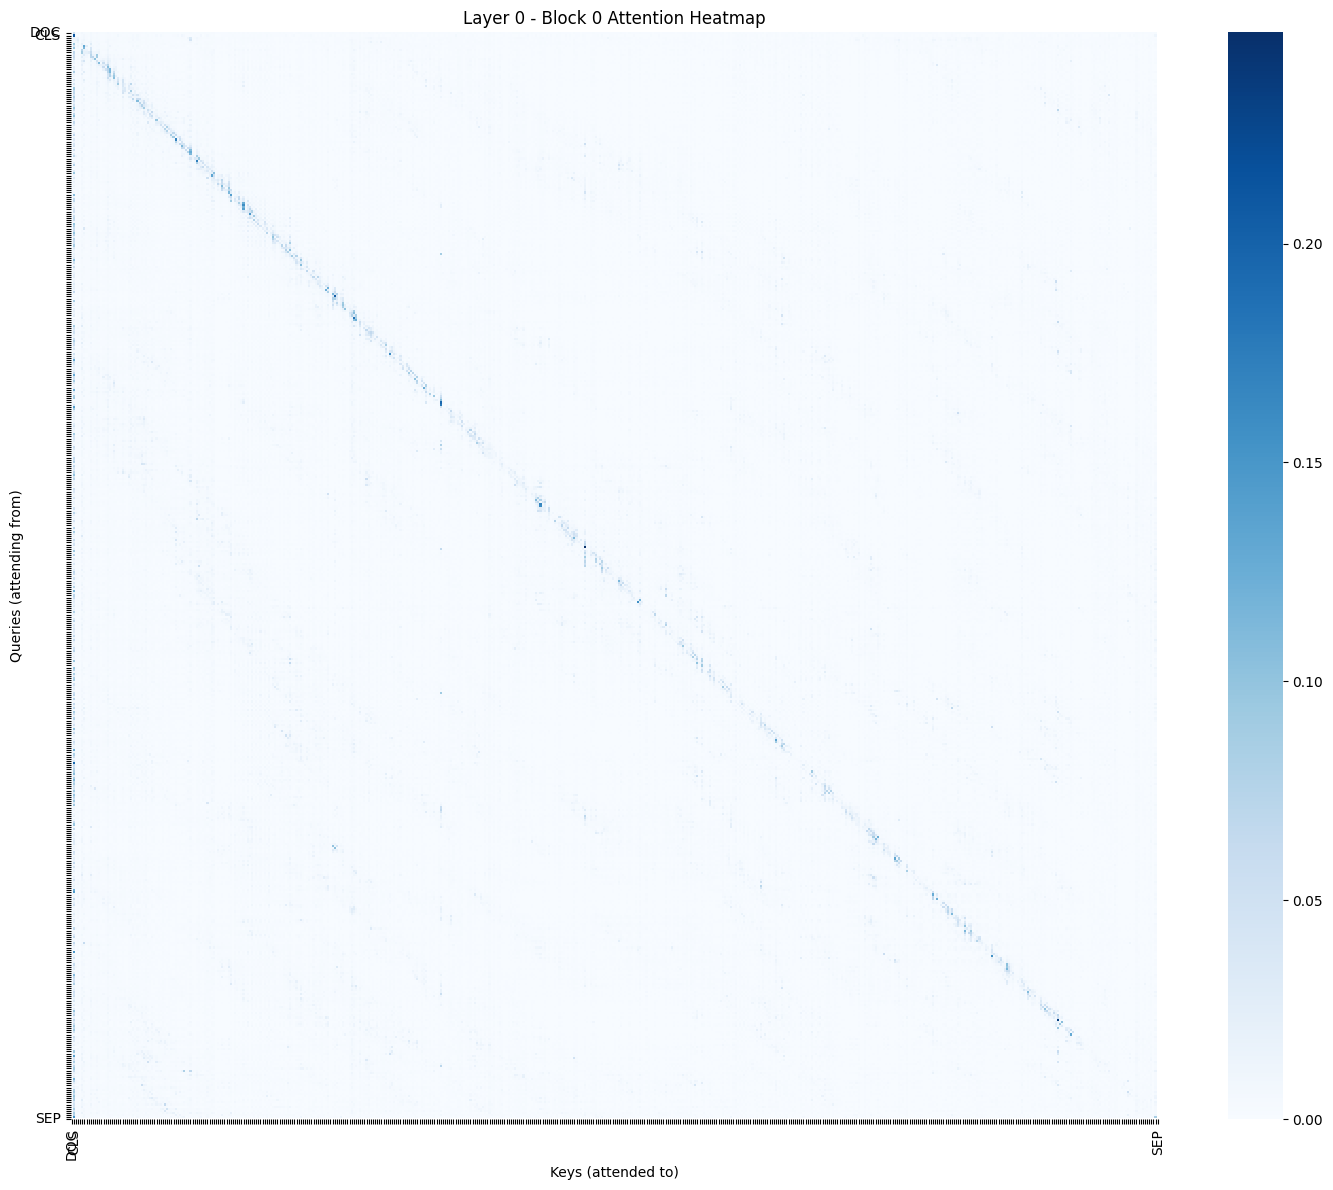

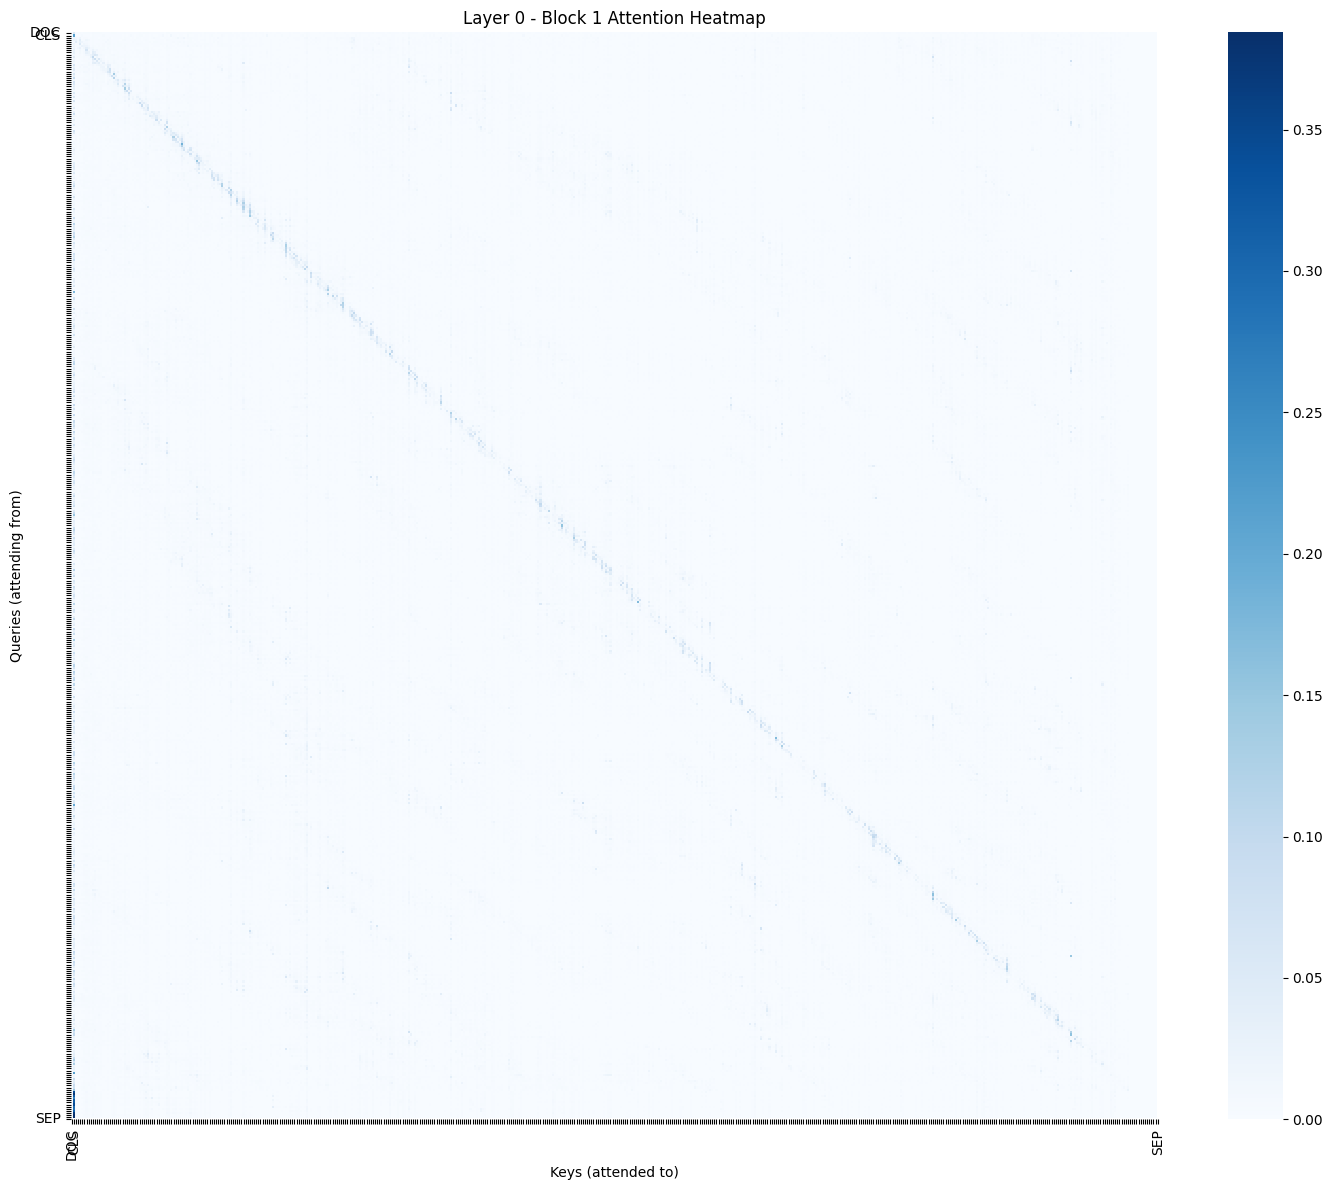

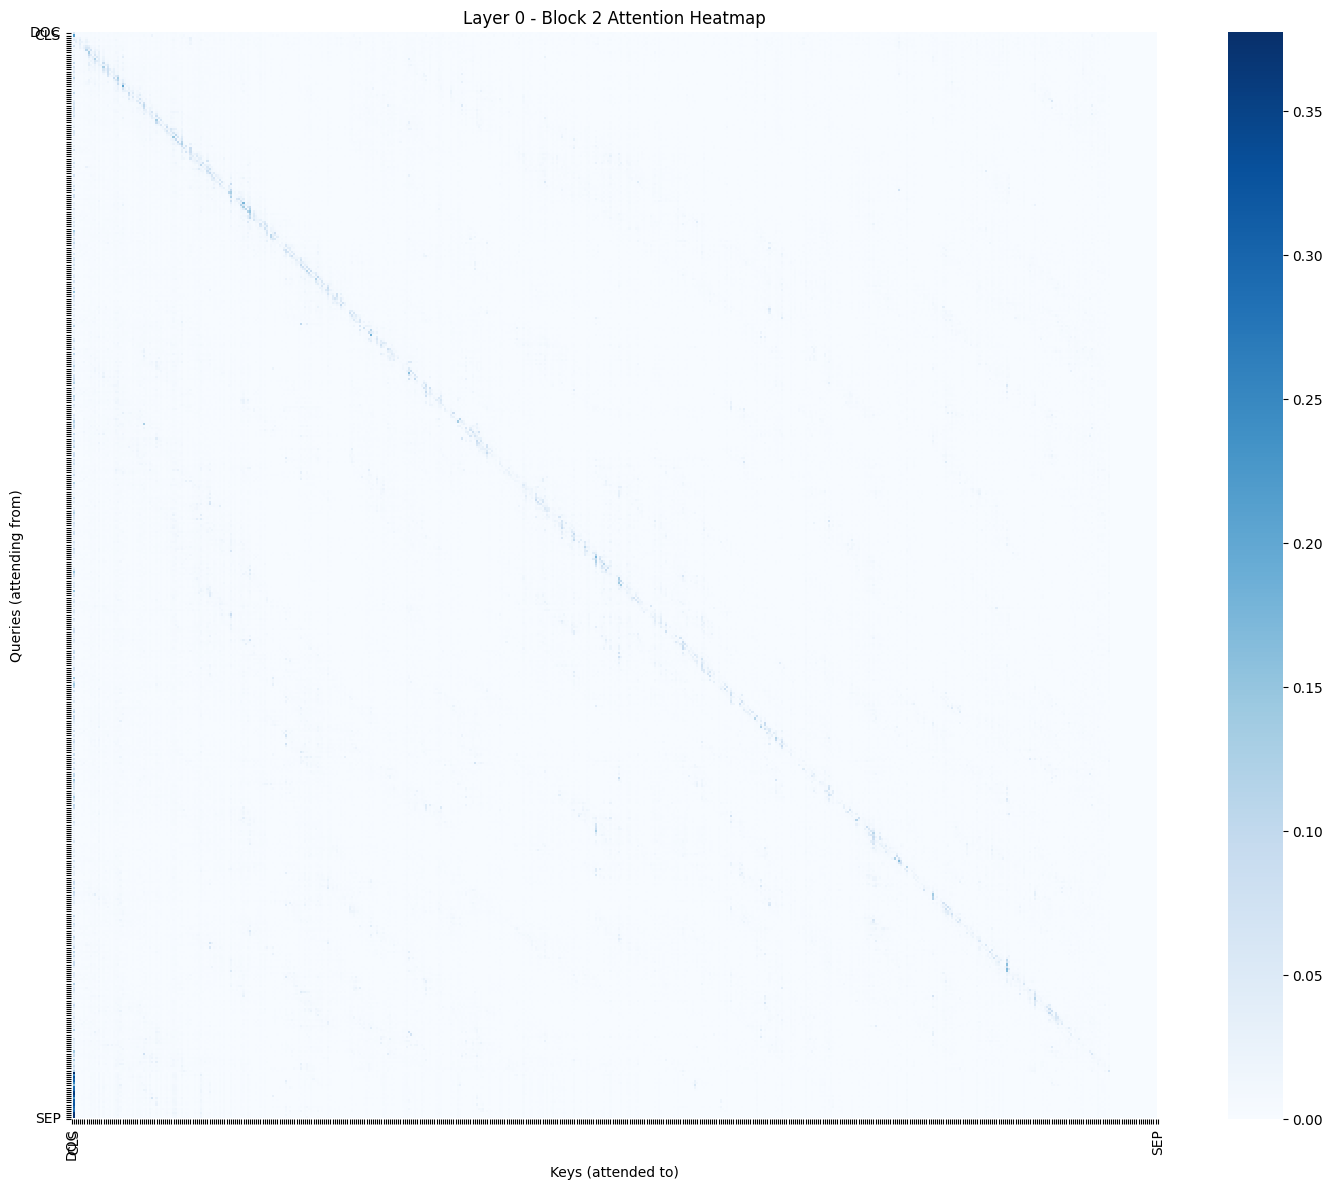

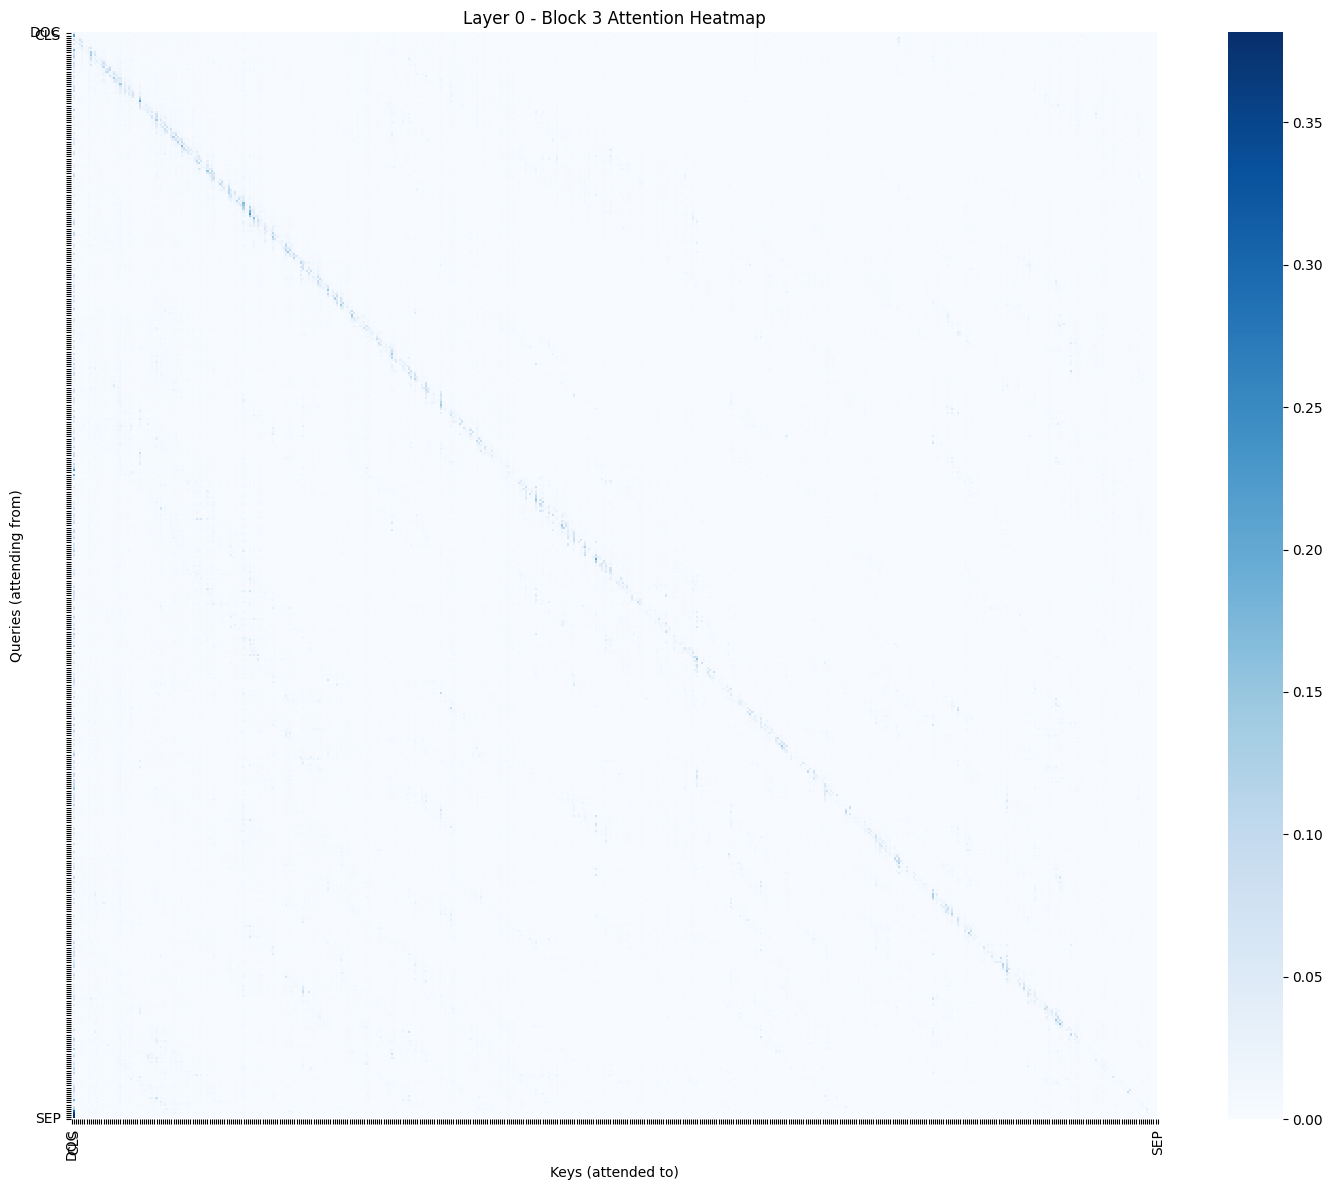

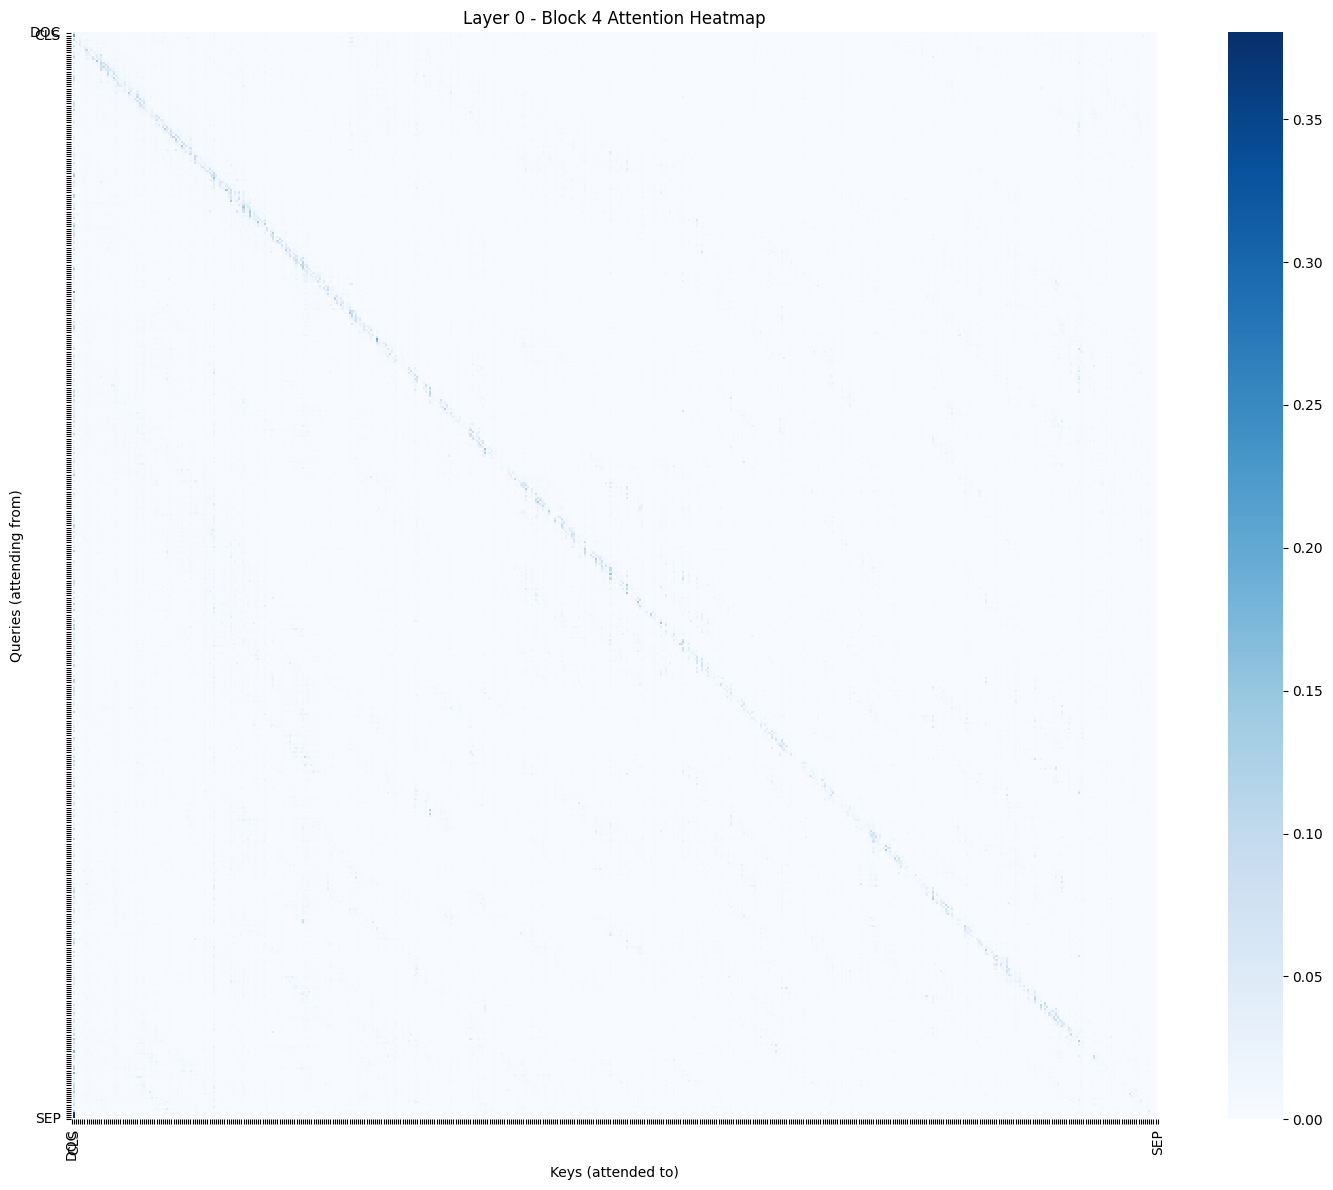

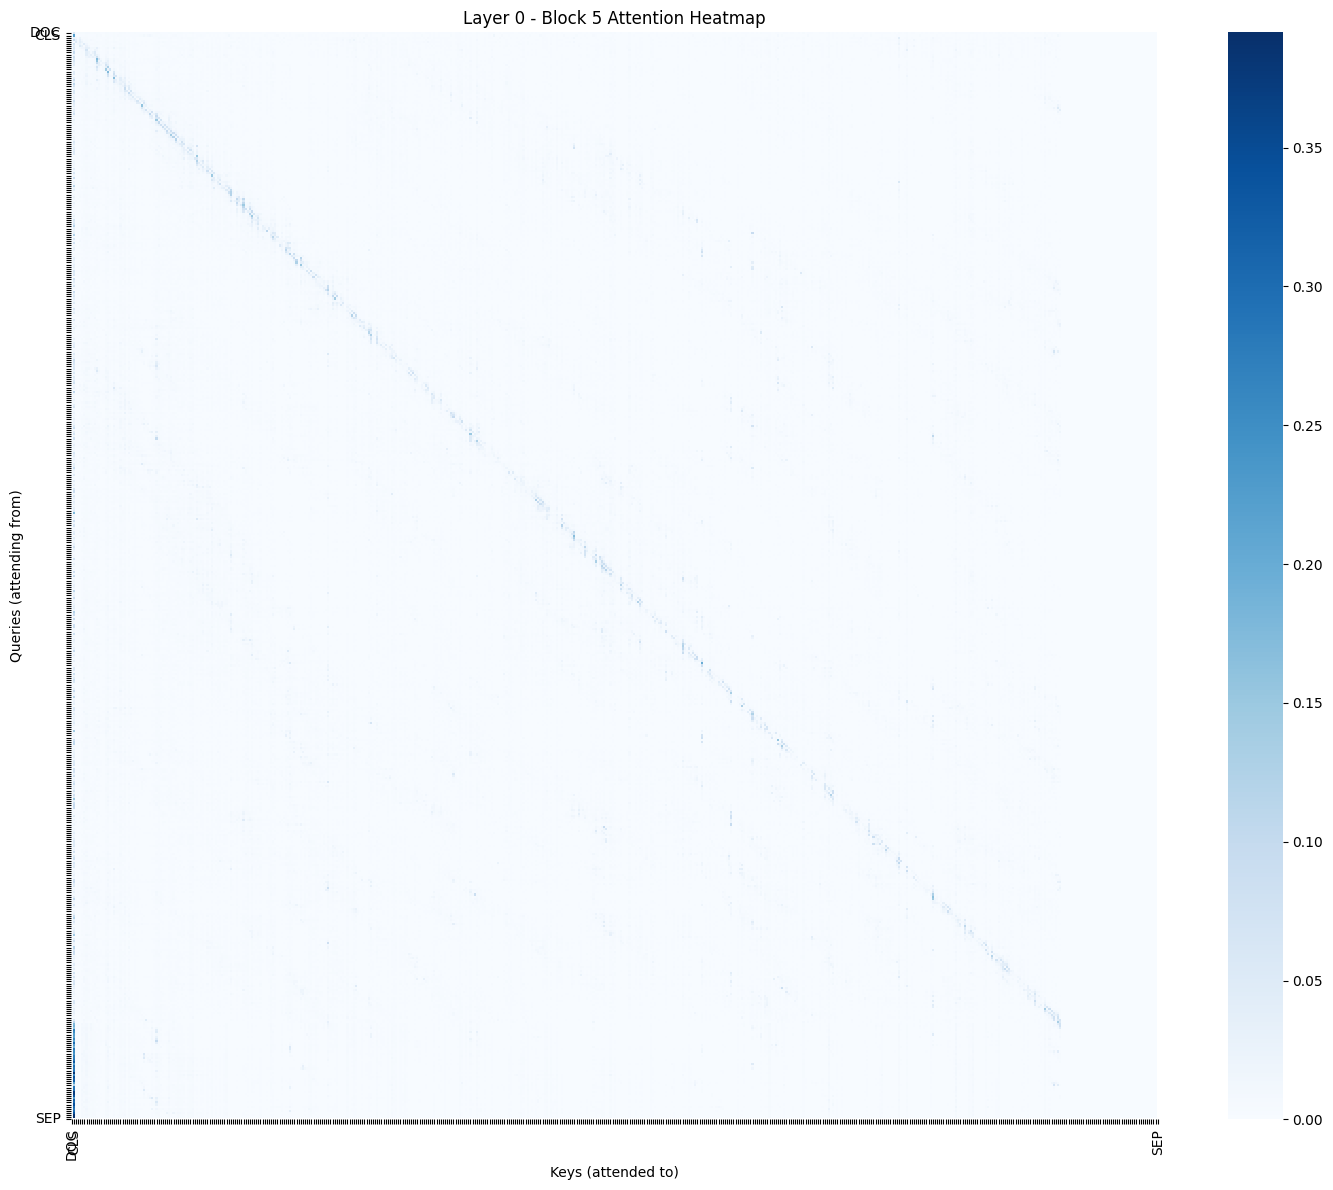

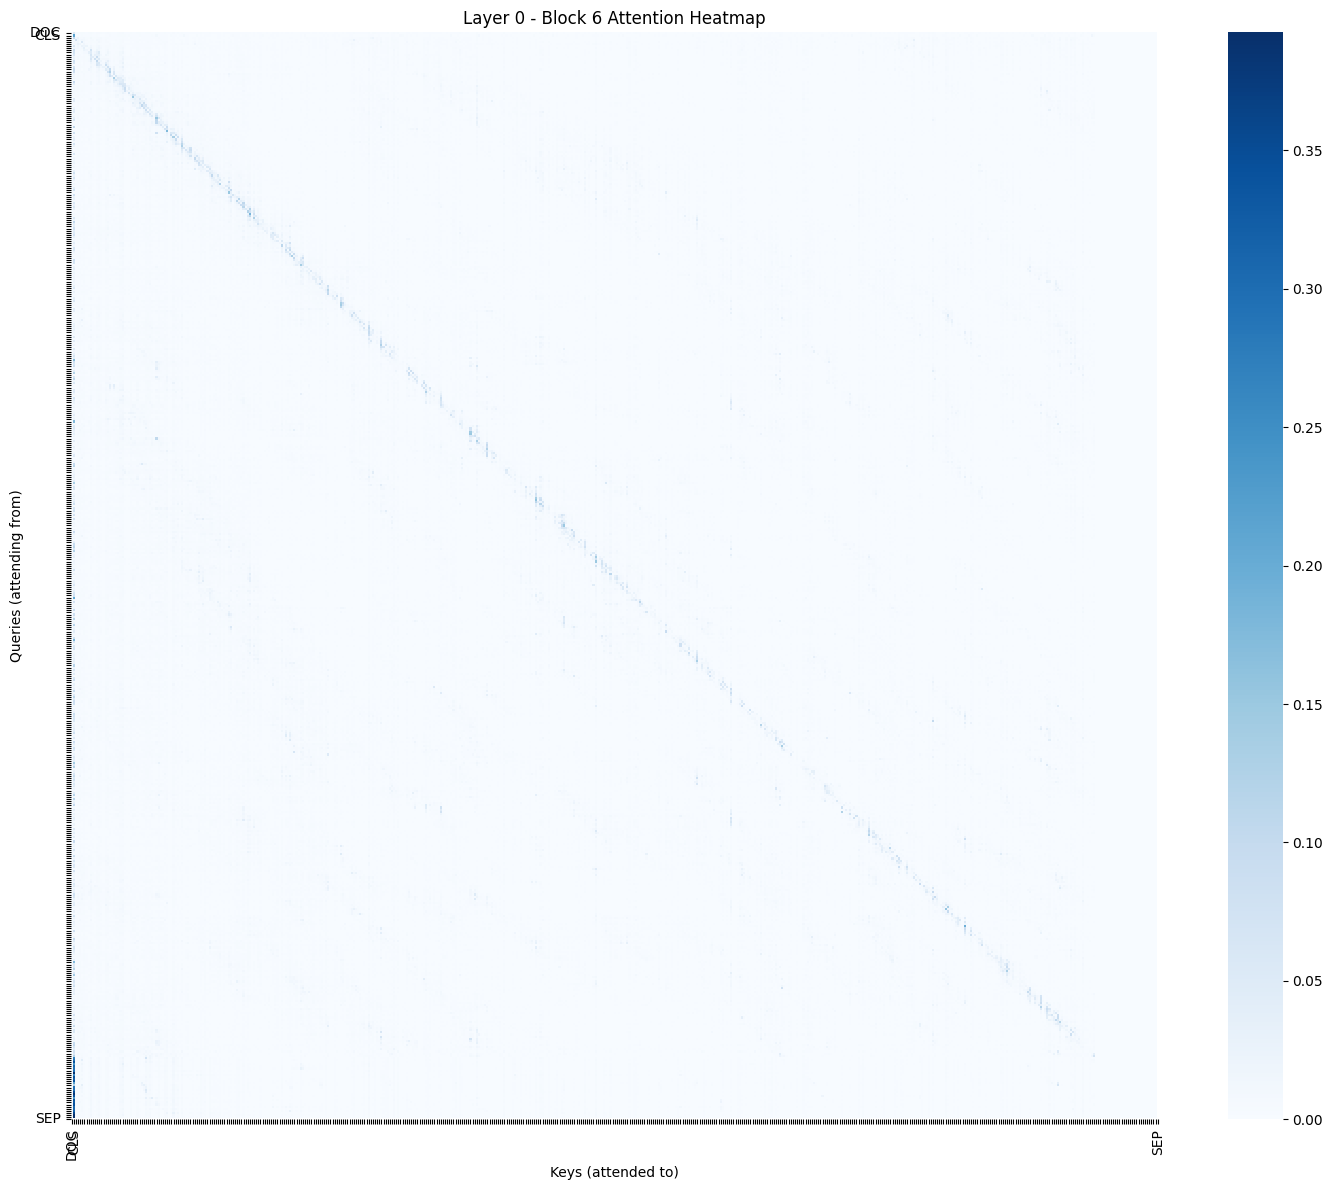

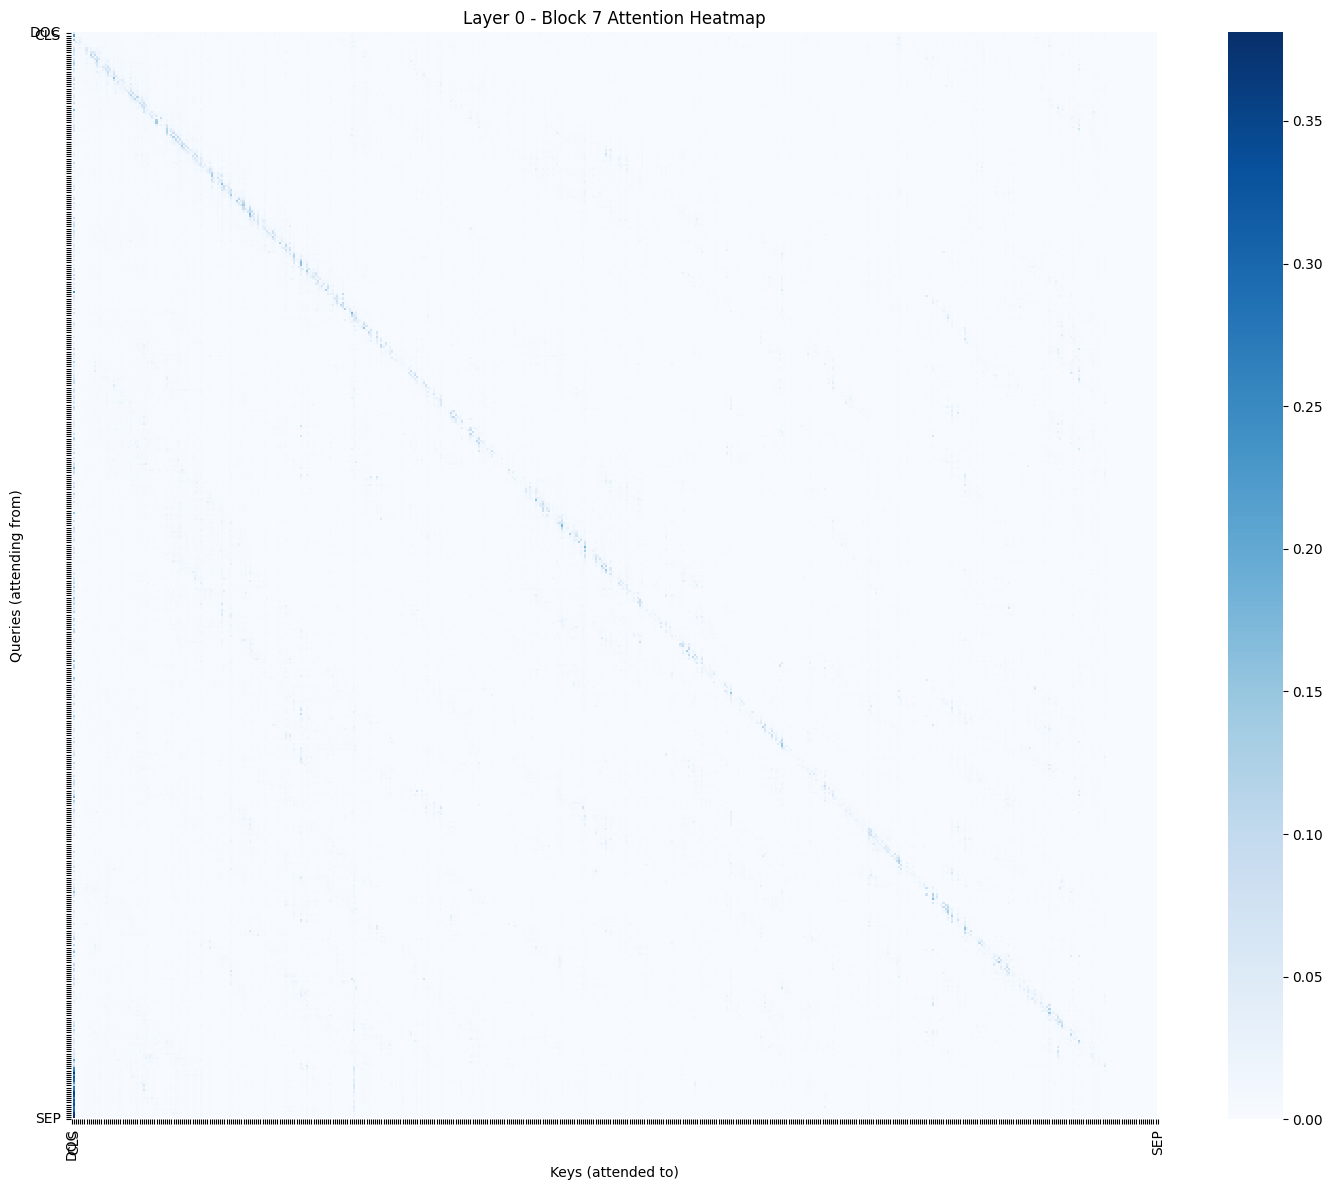

IndexError: index 512 is out of bounds for axis 0 with size 512

In [4]:
analyzer = AttentionAnalyzer(model, tokenizer, data_collator)
analyzer.analyze_block_attention(generic_long_example, structure, 0, "/u/poellhul/Documents/Masters/benchmarkIR-slurm/graphs/longtriever")

